In [1]:
import pandas as pd
import yfinance as yf

In [2]:
tesla_data = yf.Ticker("TSLA")
tesla_data_history = tesla_data.history(period="max")
tesla_data_history.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [11]:
import requests
from bs4 import BeautifulSoup

In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [13]:
data = requests.get(url).text
print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [14]:
soap = BeautifulSoup(data, 'html.parser')

In [15]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [16]:
table = soap.find('table', {'class': 'historical_data_table table'})

In [17]:
for row in soap.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [18]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [19]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [20]:
data = requests.get(url).text
print(data)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [21]:
soap = BeautifulSoup(data, 'html.parser')

In [24]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [22]:
table = soap.find('table', {'class': 'historical_data_table table'})

In [25]:
for row in soap.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [57]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [26]:
gme_data = yf.download(tickers="GME", period="max", interval="1d")
gme_data.head(5)


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GME,GME,GME,GME,GME,GME
Date,,,,,,
2002-02-13 00:00:00+00:00,1.691667,2.51250,2.51500,2.38125,2.40625,76216000
2002-02-14 00:00:00+00:00,1.683251,2.50000,2.54875,2.48125,2.54375,11021600
2002-02-15 00:00:00+00:00,1.674834,2.48750,2.50625,2.46250,2.50000,8389600
2002-02-19 00:00:00+00:00,1.607504,2.38750,2.47500,2.34375,2.47500,7410400
2002-02-20 00:00:00+00:00,1.662210,2.46875,2.46875,2.38125,2.40000,6892800


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

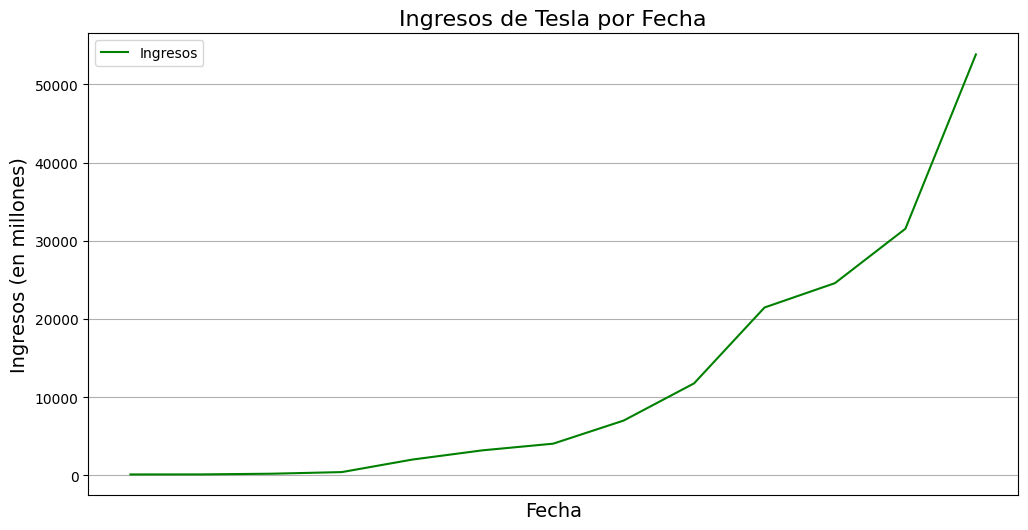

In [28]:
# Función para graficar los datos
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Revenue'], label='Ingresos', color='green')
    plt.title(title, fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Ingresos (en millones)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generar el gráfico
make_graph(tesla_revenue, "Ingresos de Tesla por Fecha")


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# URL con los datos de las acciones de GameStop
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Leer la tabla de datos desde el HTML
tables_gme = pd.read_html(url_gme)
gme_stock = tables_gme[0]  # Seleccionamos la primera tabla

# Limpiar datos
gme_stock.columns = ['Date','Close']  # Renombrar columnas
gme_stock['Close'] = gme_stock['Close'].str.replace(',', '').astype(float)  # Limpiar la columna 'Close'
gme_stock['Date'] = pd.to_datetime(gme_stock['Date'])  # Convertir las fechas

# Función para graficar los datos
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Precio de cierre', color='purple')
    plt.title(title, fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Precio de cierre (USD)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Generar el gráfico de las acciones de GameStop
make_graph(gme_stock, "Precio de las acciones de GameStop por Fecha")


ValueError: could not convert string to float: '$6466'